In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы.

### Вопросы, на которые нужно ответить в презентации:
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :)

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией.

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме.
Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NetflixShows.csv to NetflixShows.csv


In [ ]:
data = pd.read_csv("NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:

data


,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


In [ ]:
data.describe()

,release year,user rating score
count,1000.000000,605.000000
mean,2010.335000,84.094215
std,8.877927,12.344371
min,1940.000000,55.000000
25%,2007.000000,75.000000
50%,2015.000000,88.000000
75%,2016.000000,95.000000
max,2017.000000,99.000000


In [ ]:
#duplicated_data
dup_data = data[data['title'].duplicated()]
#unique_data
unique_data = data.drop_duplicates()
dup_data

,title,rating,ratingLevel,release year,user rating score
50,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
52,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
53,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
56,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
57,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
...,...,...,...,...,...
991,Dawn of the Croods,TV-Y7,Suitable for children ages 7 and older,2017,72.0
992,Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,2016,NaN
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN


In [ ]:
agg_func = {
    'title': ['count']
}
#group by rating for both datasets
gr_dup_data = dup_data.groupby('rating').agg(agg_func)['title'].sort_values(ascending=False, by=['count'])
gr_unique_data = unique_data.groupby('rating').agg(agg_func)
gr1 = gr_unique_data['title'].sort_values(ascending=False, by=['count'])
gr_dup_data


,count
rating,
TV-14,128
PG,95
G,85
TV-MA,68
TV-Y,32
TV-PG,27
TV-G,23
TV-Y7-FV,19
TV-Y7,15


Text(0, 0.5, 'Количество')

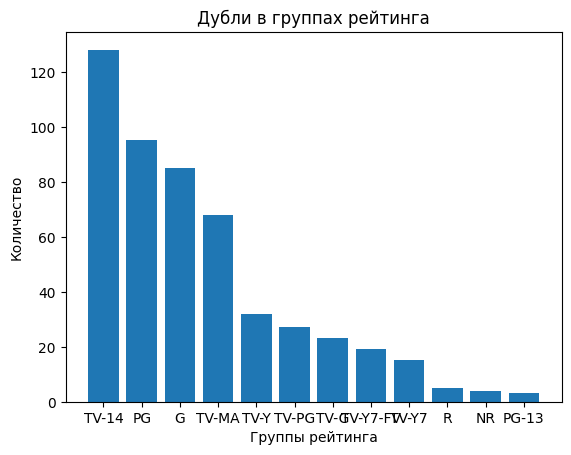

In [ ]:
plt.bar(gr_dup_data.index, gr_dup_data['count'])
plt.title('Дубликаты в группах рейтинга')
plt.xlabel('Группы рейтинга')
plt.ylabel('Количество')

In [ ]:
unique_data.вуыскшиу()

,release year,user rating score
count,500.000000,256.000000
mean,2010.976000,81.398438
std,7.829305,12.730904
min,1940.000000,55.000000
25%,2009.000000,71.000000
50%,2014.000000,83.500000
75%,2016.000000,93.000000
max,2017.000000,99.000000


In [ ]:
unique_data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


In [ ]:
for_hist_by_years = dup_data.groupby('release year').agg(agg_func)['title']
print(for_hist_by_years)

              count
release year       
1940              2
1976              3
1978              1
1982              4
1986              3
1987              1
1990              5
1991              4
1992              1
1993              9
1994              2
1995              4
1997             19
1998             17
1999             14
2000             10
2001              5
2002             10
2003              6
2004              1
2005              4
2006              9
2007             10
2008             11
2009             10
2010              7
2011              6
2012             18
2013             24
2014             24
2015             49
2016            147
2017             64


Text(0, 0.5, 'Количество')

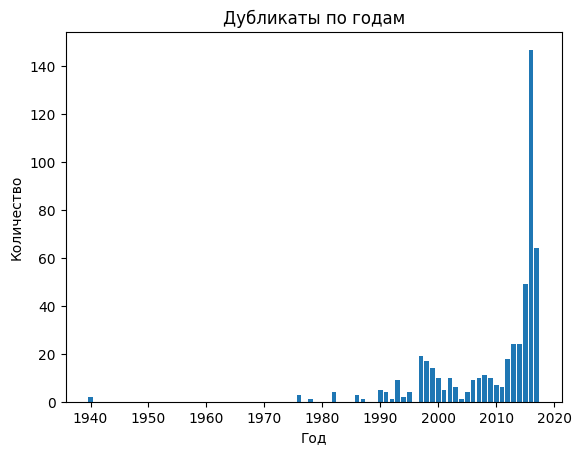

In [ ]:
plt.bar(for_hist_by_years.index, for_hist_by_years['count'])
plt.title('Дубликаты по годам')
plt.xlabel('Год')
plt.ylabel('Количество')

In [ ]:
unique_data.isna().sum()

title                  0
rating                 0
ratingLevel           33
release year           0
user rating score    244
dtype: int64

### Удалите из данных дубликаты.
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

### Сколько рейтинговых групп представлено в данных?

In [ ]:
unique_data.groupby('rating').agg({'title': 'count'})

,title
rating,
G,53
NR,10
PG,76
PG-13,12
R,14
TV-14,106
TV-G,29
TV-MA,82
TV-PG,33


In [ ]:
np.unique(data['rating'])

array(['G', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG',
       'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'], dtype=object)

### Какие оценки пользователи ставят чаще?

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

Text(0, 0.5, 'Количество')

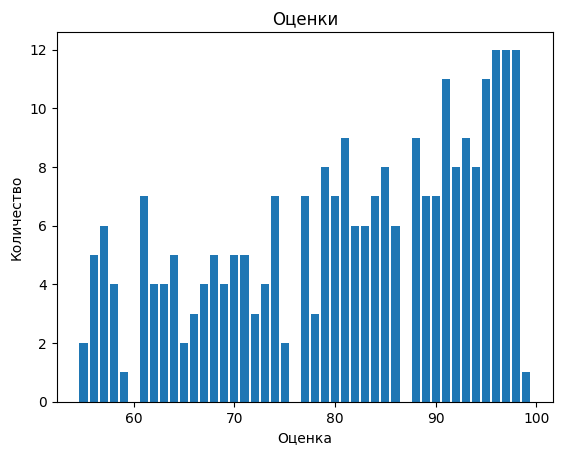

In [ ]:
plt.bar(rate_for_hist.index, rate_for_hist['count'])
plt.title('Оценки')
plt.xlabel('Оценка')
plt.ylabel('Количество')

<Axes: xlabel='user rating score'>

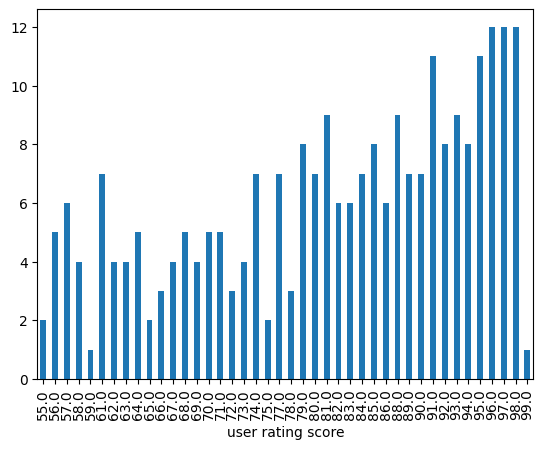

In [ ]:
rate_for_hist = unique_data.groupby('user rating score').agg({'title':['count']})['title']
rate_for_hist.plot.bar(legend=False)

In [ ]:
rate_for_hist

,count
user rating score,
55.0,2
56.0,5
57.0,6
58.0,4
59.0,1
61.0,7
62.0,4
63.0,4
64.0,5


### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана?
- Отличаются ли медиана и среднее?
- Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
stat_agg = {'user score rating': ['mean', 'max', 'min', 'median']}

In [ ]:
unique_data['user rating score'].agg(['mean', 'std', 'max', 'min', 'median'])

mean      81.398438
std       12.730904
max       99.000000
min       55.000000
median    83.500000
Name: user rating score, dtype: float64

### В какие годы были запущены шоу, представленные в датасете?

In [ ]:
years = np.unique(unique_data['release year'])


### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года.

- Наблюдается ли рост?
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

Text(0, 0.5, 'Количество')

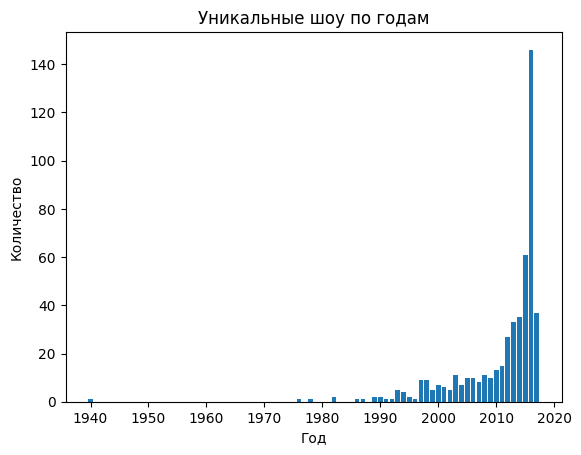

In [ ]:
shows_for_graph = unique_data.groupby('release year').agg(agg_func)['title']
plt.bar(shows_for_graph.index, shows_for_graph['count'])
plt.title('Уникальные шоу по годам')
plt.xlabel('Год')
plt.ylabel('Количество')

In [ ]:
strange_data = for_hist_by_years.merge(shows_for_graph, how='inner', on='release year')
np.corrcoef(strange_data['count_x'], strange_data['count_y'] )[0,1]
strange_data

,count_x,count_y
release year,,
1940,2,1
1976,3,1
1978,1,1
1982,4,2
1986,3,1
1987,1,1
1990,5,2
1991,4,1
1992,1,1


Да, наблюдается рост, причем экспоненциальный. До 1992 в датасете представлено небольшое количество фильмов (не более 2 фильмов в каждый из годов, плюс с интервалом 10+ лет в период 1940-1990гг.). В интервале 1990 - 2010 год наблюдаются сильные флуктуации. При этом появляется рост, но не такой стабильный, как с 2010 года. Думаю, этот этап характеризуется следующими событиями:


1.    Компания Netflix была основана в 1997 году, в сфере кинопроизводства на тот момент был этап, в котором господствуют "DVD-диски", а значит, что спрос на фильмы, выпущенные до 1997 года не настолько велик, значит коммерческой компании нет смысла выкупать права на них;
2.    Резкий скачок в 1997 году по всей видимости обусловлен появлением компании и необходимостью стартовой рекламной компанией, для которой выкупались все новинки.
3. Флуктуации после 1998 года обусловлены тем, что компания выкупает права лишь на самые перспективные фильмы, поскольку не обладает достаточным капиталом для того, чтобы значительно рсширить свою фильмотеку

2010-ые годы можно охарктеризовать следующими утверждениями:


1.   На этом этапе компания становится уже крупным стриминговым сервисом, расширяющем международное влияние, ввиду чего у компании возникает необходимость расширения выбора для клиентов.
2.   Резкий рост начинается с 2013 года, Netflix в этот момент начинает создавать фильмы собственного произодства.
3. Резкий спад в 2017 году можно назвать выбросом, поскольку данные собраны на момент 06.2017 года, а значит последнее значение - это данные лишь за полгода, их нельзя считать объективными.






In [ ]:
shows_for_graph

,count
release year,
1940,1
1976,1
1978,1
1982,2
1986,1
1987,1
1989,2
1990,2
1991,1


### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017.
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
- Как еще можно оценить "Успешность"?



In [ ]:
ave_agg_func = {
    'user rating score':['mean', 'median']
}
unique_data.groupby('release year').agg(ave_agg_func)

user rating score       
                          mean median
release year                         
1940                 61.000000   61.0
1976                       NaN    NaN
1978                 86.000000   86.0
1982                 68.000000   68.0
1986                 67.000000   67.0
1987                 58.000000   58.0
1989                 80.000000   80.0
1990                 65.000000   65.0
1991                       NaN    NaN
1992                 70.000000   70.0
1993                 87.000000   84.0
1994                 80.000000   78.5
1995                 69.000000   69.0
1996                       NaN    NaN
1997                 80.800000   81.0
1998                 79.000000   81.0
1999                 78.250000   75.5
2000                 85.000000   85.5
2001                 87.000000   87.0
2002                 90.500000   90.5
2003                 72.600000   66.0
2004                 83.000000   82.0
2005                 88.142857   90.0
2006                 69.285714   64.0
2007                 73.200000   70.0
2008                 79.833333   88.5
2009                 75.000000   74.0
2010                 78.333333   77.5
2011                 89.000000   89.0
2012                 79.437500   85.0
2013                 76.909091   81.0
2014                 74.916667   74.0
2015                 82.750000   83.5
2016                 84.313953   89.0
2017                 88.125000   90.5

Да, средниие оценки в 2017 году выше, чем в 2016 году.

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [ ]:
gr1

,count
rating,
TV-14,106
TV-MA,82
PG,76
G,53
TV-Y,36
TV-PG,33
TV-G,29
TV-Y7-FV,25
TV-Y7,23


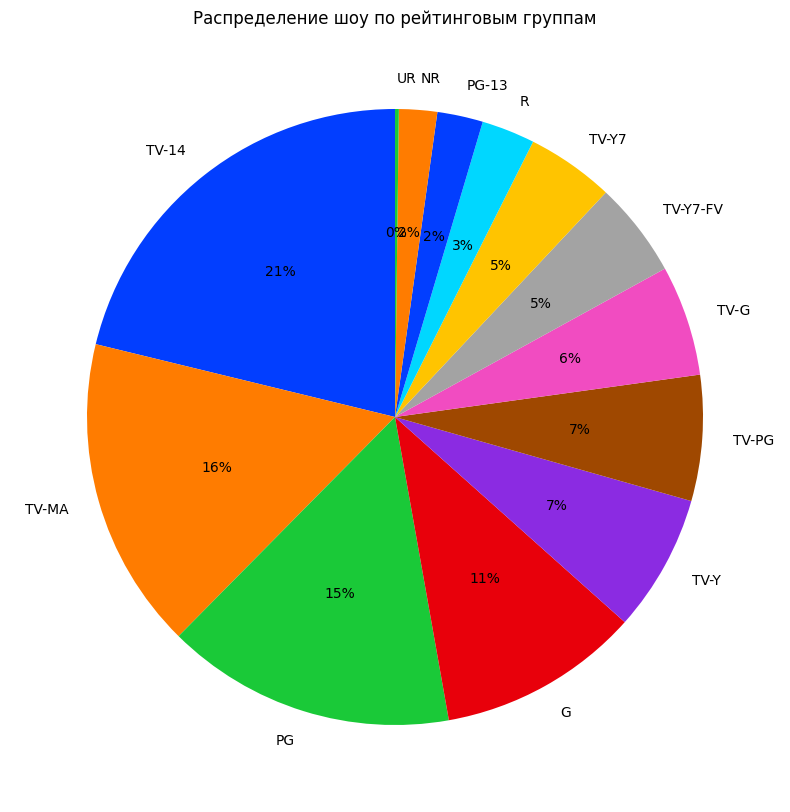

In [ ]:
# Создадим списк с подписями к секторам
keys = list(unique_data['rating'].value_counts().index)

# Создадим и выведем круговую диаграмму
palette_color = sns.color_palette('bright')
plt.figure(figsize=(10, 10))
plt.title('Распределение шоу по рейтинговым группам')
plt.pie(unique_data['rating'].value_counts(),labels=keys, colors=palette_color, autopct='%.0f%%', startangle=90)
plt.show()

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :)
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

Мы выбрали сериал 'Lost'. Данное шоу вышло в 2010 году и имеет оценку 98.0.

In [ ]:
unique_data[unique_data['title'] == 'Lost']

,title,rating,ratingLevel,release year,user rating score
350,Lost,TV-14,Parents strongly cautioned. May be unsuitable ...,2010,98.0


In [ ]:
unique_data.agg(agg_arg)

,title,user rating score
count,500.0,NaN
mean,NaN,81.398438
std,NaN,12.730904
median,NaN,83.500000


In [ ]:
#все фильмы в период с 2010 года
new_shows = unique_data[unique_data['release year'] >= 2010]
#все новые фильмы группы ТВ-14
new_tv_14 = new_shows[new_shows['rating'] == 'TV-14']
#все фильмы группы ТВ-14
all_tv_14 = unique_data[unique_data['rating'] == 'TV-14']
agg_arg = {
    'title': ['count'],
    'user rating score': ['mean', 'std', 'median',]
}
new_shows.agg(agg_arg)


,title,user rating score
count,367.0,NaN
mean,NaN,82.723757
std,NaN,12.627173
median,NaN,85.000000


Таким образом, среди новых шоу сериал 'Lost' оказывается значительно успешнее, чем большинство шоу, выпущенных после 2010 года (его оценка превышает сумму среднего значения и стандартного отклонения). Теперь оценим успех данного шоу среди новых фильмов в группу TV-14.

In [ ]:
new_tv_14.agg(agg_arg)

,title,user rating score
count,100.0,NaN
mean,NaN,82.380282
std,NaN,12.488127
median,NaN,85.000000


из представленных данных можно отметить, что рейтинговая группа TV-14, несмотря на то, что она примерно в 3.5 раза меньше, чем набор из всех шоу, имеет практически такие же значение среднего и стандартного отклонения и такую же медиану. В данной группе выбранное нами шоу 'Lost' является крайне успешным. Теперь сравним это шоу с представителями группы Tv-14 за всю историю.

In [ ]:
all_tv_14.agg(agg_arg)

,title,user rating score
count,106.0,NaN
mean,NaN,82.870130
std,NaN,12.324933
median,NaN,86.000000


Для данной выборки значения рейтинга для среднего, медианы и стандартного отклонения вновь отличаются незначительно в сравнении с остальными выборками, так что и в рамках данного сегмента выбранное шоу остается сверхуспешным. Далее рассмотрим, как много шоу имеют оценку выше 95 (как раз значение суммы среднего и стандартного отклонения оценки, округленное до целого в большую сторону) в этих 3 наборах.

In [ ]:
high_rate_new_shows = new_shows[new_shows['user rating score'] > 95]
high_rate_new_tv_14 = new_tv_14[new_tv_14['user rating score'] > 95]
high_rate_all_tv_14 = all_tv_14[all_tv_14['user rating score'] > 95]
print('Все шоу TV-14')
print(high_rate_all_tv_14.count())
print('Все шоу после 2010 года')
print(high_rate_new_shows.count())
print('Новые шоу 2014 года')
high_rate_new_tv_14.count()

Все шоу TV-14
title                14
rating               14
ratingLevel          14
release year         14
user rating score    14
dtype: int64
Все шоу старше 2010 года
title                33
rating               33
ratingLevel          31
release year         33
user rating score    33
dtype: int64
Новые шоу 2014 года


title                12
rating               12
ratingLevel          12
release year         12
user rating score    12
dtype: int64

In [ ]:
df = unique_data[unique_data['user rating score'] >= 95]
df1 = df[df['release year'] == 2016].count()
df2 = df[df['release year'] == 2017].count()
print(df1, df2, sep='\n')
print(unique_data[unique_data['release year'] == 2016].count())
print(unique_data[unique_data['release year'] == 2017].count())

title                26
rating               26
ratingLevel          26
release year         26
user rating score    26
dtype: int64
title                3
rating               3
ratingLevel          1
release year         3
user rating score    3
dtype: int64
title                146
rating               146
ratingLevel          131
release year         146
user rating score     86
dtype: int64
title                37
rating               37
ratingLevel          21
release year         37
user rating score    16
dtype: int64


0.1875